In [3]:
import pyCoat as pc
import matplotlib.pyplot as plt
import numpy as np
import os
import math as m

color_list_cbfriendly = ["#000000","#009292","#ff6db6","#6db6ff","#24ff24","#db6d00","#b66dff","#490092","#006ddb","#924900"]#,"#920000","#004949","#b6dbff","#ffb6db","#ffff6d","#009292","#ff6db6"]

The following analysis is based off code in a pci.docx file and the equation from the 2011 alexei paper

# PCI dispersion curves for different materials

C:\Users\Ross Johnston\AppData\Local\Temp\ipykernel_22300\1043786618.py:48: RuntimeWarning: invalid value encountered in divide
  ax2.plot(d,0.73*butterfly/sample_butterfly,label='Ratio')


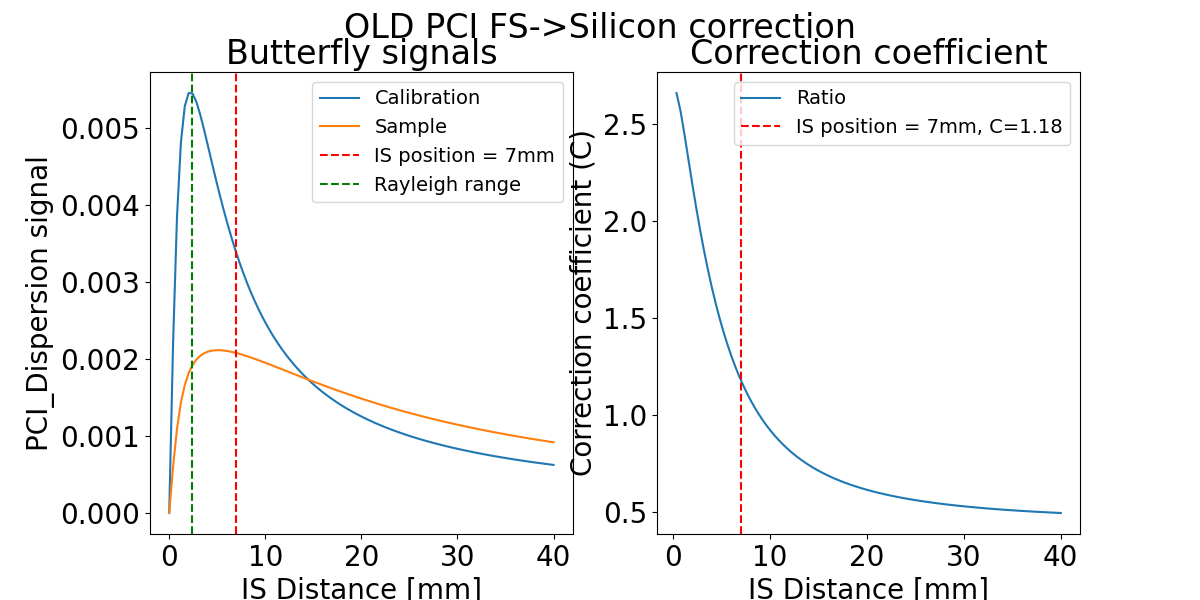

In [8]:
# recreating alexei data

N = 1e2 # Number of integration steps for integrate.Quad
beta = 0.14
fc = 380
lam1 = 1620
source = 'surf'
d = np.linspace(0,40,100)

# For the calibration
n= 1.444
dn_dt = 1 # no e-5
k = 1.38
rho = 2.2e3
c = 703
w0 = 35
w1 = 115


butterfly = np.asarray([pc.PCI_Dispersion(N,dn_dt,n,k,rho,c,beta,fc,w0,w1,lam1,x,source=source)[0] for x in d])

# For Silcion sample

Si_n = 3.47 
Si_dn_dT = 18 # no e-5
Si_k = 130  # correction sheet quotes as 130
Si_rho = 2.33e3
Si_c = 700

sample_butterfly = np.asarray([pc.PCI_Dispersion(N,Si_dn_dT,Si_n,Si_k,Si_rho,Si_c,beta,fc,w0,w1,lam1,x,source=source)[0] for x in d])
C = 0.73*pc.PCI_Dispersion(N,dn_dt,n,k,rho,c,beta,fc,w0,w1,lam1,7,source=source)[0]/pc.PCI_Dispersion(N,Si_dn_dT,Si_n,Si_k,Si_rho,Si_c,beta,fc,w0,w1,lam1,7,source=source)[0]

Ray_fs = m.pi*pow(w0*1e-6,2)/(lam1*1e-9)*1000

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 6, forward=True)

fig.suptitle('OLD PCI FS->Silicon correction')
ax1.plot(d,butterfly,label='Calibration')
ax1.plot(d,sample_butterfly,label='Sample')
ax1.axvline(x=7,color='r',linestyle='--',label='IS position = 7mm')
ax1.axvline(x=Ray_fs,color='g',linestyle='--',label='Rayleigh range')
ax1.set_xlabel('IS Distance [mm]')
ax1.set_ylabel('PCI_Dispersion signal')
ax1.set_title('Butterfly signals')
ax1.legend()

ax2.plot(d,0.73*butterfly/sample_butterfly,label='Ratio')
ax2.axvline(x=7,color='r',linestyle='--',label='IS position = 7mm, C={}'.format(np.round(C,2)))
ax2.set_ylabel('Correction coefficient (C)')
ax2.set_xlabel("IS Distance [mm]")
ax2.set_title('Correction coefficient')
ax2.legend()


C:\Users\Ross Johnston\AppData\Local\Temp\ipykernel_22300\2880507981.py:51: RuntimeWarning: invalid value encountered in divide
  ax2.plot(d,butterfly/sample_butterfly,label='Ratio')


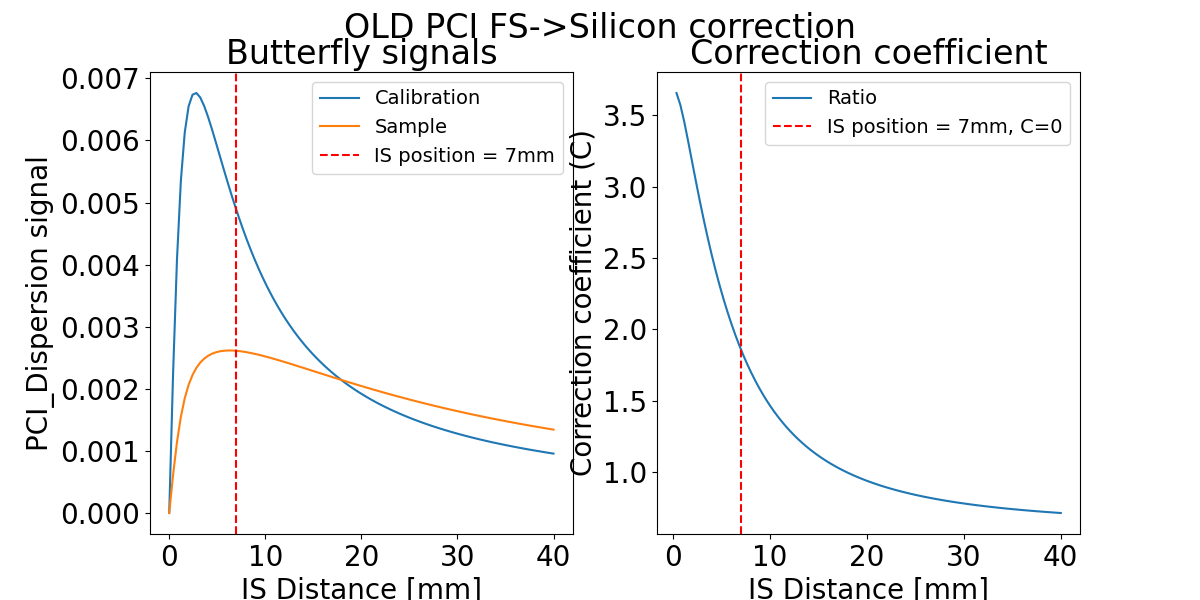

In [7]:
# Trying to recreate the bulk PCI correction values listed in pdf and new software manual 


# Is it simply the scaling between bulk and sufrace dispersion models?

# recreating alexei data

N = 1e2 # Number of integration steps for integrate.Quad
beta = 0.14
fc = 380
lam1 = 1310
source = 'surface'
d = np.linspace(0,40,100)

# For the calibration
n= 1.444
dn_dt = 1 # no e-5
k = 1.38
rho = 2.2e3
c = 703
w0 = 35
w1 = 115

# For Silcion sample

Si_n = 3.47 
Si_dn_dT = 18 # no e-5
Si_k = 130  # correction sheet quotes as 130
Si_rho = 2.33e3
Si_c = 700

butterfly = np.asarray([pc.PCI_Dispersion(N,dn_dt,n,k,rho,c,beta,fc,w0,w1,lam1,x,source=source)[0] for x in d])
#butterfly = np.asarray([PCI_Dispersion(N,Si_dn_dT,Si_n,Si_k,Si_rho,Si_c,beta,fc,w0,w1,lam1,x,source=source)[0] for x in d])

sample_butterfly = np.asarray([pc.PCI_Dispersion(N,Si_dn_dT,Si_n,Si_k,Si_rho,Si_c,beta,fc,w0,w1,lam1,x,source=source)[0] for x in d])
#print(0.73*PCI_Dispersion(N,dn_dt,n,k,rho,c,beta,fc,w0,w1,lam1,7,source=source)[0]/PCI_Dispersion(N,Si_dn_dT,Si_n,Si_k,Si_rho,Si_c,beta,fc,w0,w1,lam1,7,source=source)[0])

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 6, forward=True)

fig.suptitle('OLD PCI FS->Silicon correction')
ax1.plot(d,butterfly,label='Calibration')
ax1.plot(d,sample_butterfly,label='Sample')
ax1.axvline(x=7,color='r',linestyle='--',label='IS position = 7mm')
ax1.set_xlabel('IS Distance [mm]')
ax1.set_ylabel('PCI_Dispersion signal')
ax1.set_title('Butterfly signals')
ax1.legend()

ax2.plot(d,butterfly/sample_butterfly,label='Ratio')
ax2.axvline(x=7,color='r',linestyle='--',label='IS position = 7mm, C={0}'.format(0))
ax2.set_ylabel('Correction coefficient (C)')
ax2.set_xlabel("IS Distance [mm]")
ax2.set_title('Correction coefficient')
ax2.legend()

# Plot the 1064nm PCI dispersion curves for different dates and different

'\npath = "C:/Users/Ross Johnston/OneDrive - University of Glasgow/Documents/PhD/RJ_PHD_Code/Data/2. Thin-film coating absorption measurements Data/Buttefly"\ndata_buttefly_master = np.loadtxt(os.path.join(path,\'1550_butterfly_master.txt\'),skiprows=1,usecols=[0,1,2],dtype=\'str\',delimiter=\',\')\ndatasets = np.unique(data_buttefly_master[:,0])\n\ndatasets = np.delete(datasets,1)\n\nfor i,set in enumerate(datasets):\n    data = data_buttefly_master[np.where(data_buttefly_master[:,0]==set)]\n    # sort data by the first column\n    data = data[np.argsort(data[:,1])]\n    position = data[:,1].astype(float)\n    R_value = data[:,2].astype(float)\n    ax2.scatter(position,R_value/np.max(R_value),label=set,color=color_list_cbfriendly[i],marker=marker_list[i],s=marker_size)\n    # polynomial fit\n    p = np.polyfit(position,R_value,4)\n    x_min = np.min(position)\n    x_max = np.max(position)\n    x = np.linspace(x_min,x_max,100)\n    y = np.polyval(p,x)\n    ax2.plot(x,y/np.max(y),color=

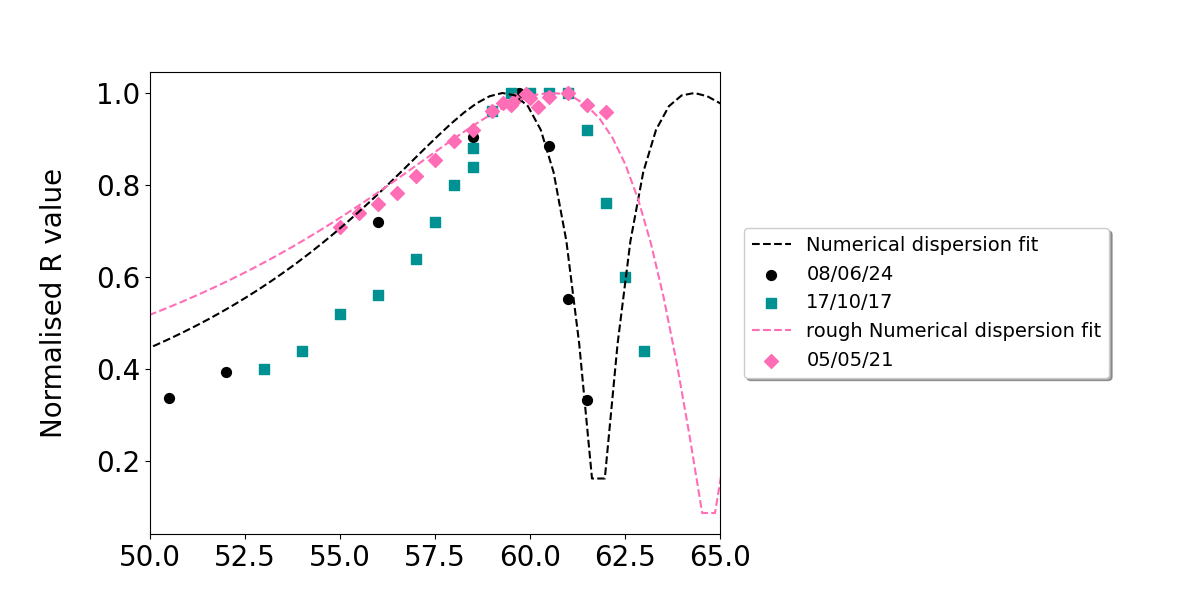

In [5]:

%matplotlib widget

fig = plt.figure()
ax1 = fig.add_subplot(111)
#ax2 = fig.add_subplot(212)
fig.set_size_inches(12, 6, forward=True)
fig.subplots_adjust(wspace=0.4,hspace=0.4,right=0.6)
font_size = 20
legend_font_size = 14
plt.rcParams.update({'font.size': font_size})
plt.rcParams['legend.fontsize'] = legend_font_size
ax1.set_xlabel('Imaging stage position (mm)',fontsize=font_size, labelpad=20)
ax1.set_ylabel('Normalised R value',fontsize=font_size, labelpad=20)
ax1.set_xlim(50,65)

# Plot all the data


data_buttefly_master = np.loadtxt('1064_butterfly_master.txt',skiprows=1,usecols=[0,1,2],dtype='str',delimiter=',')
datasets = np.unique(data_buttefly_master[:,0])

datasets = np.delete(datasets,1)
datasets = np.delete(datasets,2)
datasets = np.delete(datasets,3)

marker_list = ['o','s','D']
marker_size = 50

for i,set in enumerate(datasets):
    data = data_buttefly_master[np.where(data_buttefly_master[:,0]==set)]
    # sort data by the first column
    data = data[np.argsort(data[:,1])]

    if set=='08/06/24':
        ind_low = 2
        ind_high = len(data)-2
        position = data[ind_low:ind_high,1].astype(float)
        R_value = data[ind_low:ind_high,2].astype(float)

        # dispersion curve
        source = 'surf'
        #source = 'bulk'
        scale = 1
        range_IS = np.linspace(-15*scale,15*scale,90)
        w_probe = 151.5#e-6
        w_pump = 31.75#e-6
        #
        #w_pump = 80#e-6
        wv = 1310
        beta = 0.14
        fc = 407
        range_dispersion = np.asarray([pc.PCI_Dispersion(1e2,1e-5,1.44,1.38,2.2e3,703,beta,fc,w_pump,w_probe,wv,d,source=source)[0] for d in range_IS])
        b = np.max(range_dispersion)
        range_dispersion = range_dispersion/np.max(range_dispersion)
        dispersion_offset_a = 61.8
        ax1.plot(range_IS+dispersion_offset_a,range_dispersion,label='Numerical dispersion fit',color='k',linestyle='--')

    elif set=='May 2024':

        ind_low = 1
        ind_high = len(data)-2
        position = data[ind_low:ind_high,1].astype(float) 
        R_value = data[ind_low:ind_high,2].astype(float)
        
    elif set=='May 2021':

        set = '05/05/21'
        # dispersion curve
        source = 'surf'
        #source = 'bulk'
        scale = 1
        range_IS = np.linspace(-15*scale,15*scale,90)
        w_probe = 151.5#e-6
        w_pump = 48#e-6
        wv = 1310
        beta = 0.14
        fc = 407
        range_dispersion = np.asarray([pc.PCI_Dispersion(1e2,1e-5,1.44,1.38,2.2e3,703,beta,fc,w_pump,w_probe,wv,d,source=source)[0] for d in range_IS])
        range_dispersion = range_dispersion/np.max(range_dispersion)
        dispersion_offset_a = 64.7
        ax1.plot(range_IS+dispersion_offset_a,range_dispersion,label='rough Numerical dispersion fit',color=color_list_cbfriendly[2],linestyle='--')
        position = data[:,1].astype(float)
        R_value = data[:,2].astype(float)

    elif set=='17/10/17':
        position_shift = 0
        position = data[:,1].astype(float) + position_shift
        R_value = data[:,2].astype(float)

    else:
        position = data[:,1].astype(float)
        R_value = data[:,2].astype(float)
        
    ax1.scatter(position,R_value/np.max(R_value),label=set,color=color_list_cbfriendly[i],marker=marker_list[i],s=marker_size)
    # polynomial fit
    p = np.polyfit(position,R_value,4)
    x_min = np.min(position)
    x_max = np.max(position)
    x = np.linspace(x_min,x_max,100)
    y = np.polyval(p,x)
    #ax1.plot(x,y/np.max(y),color=color_list_cbfriendly[i])




ax1.legend(loc='center right',bbox_to_anchor=(1.7, 0.5), shadow=True, ncol=1)

